In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Loading...
product_df = pd.read_csv('product.csv')
purchase_header_df = pd.read_csv('purchase_header.csv')  
purchase_lines_df = pd.read_csv('purchase_lines.csv')    

# Peeking...

# -- Products
product_df_features = product_df.columns.tolist()  
product_df_dim = product_df.shape

# -- Purchase Header
purchase_header_df_features = purchase_header_df.columns.tolist()
purchase_header_df_dim = purchase_header_df.shape

# -- Purchase Lines
purchase_lines_df_features = purchase_lines_df.columns.tolist()
purchase_lines_df_dim = purchase_lines_df.shape

# What are we working with?

print("Products DataFrame:")
print()
print(product_df.info())
print()
print(product_df.head())
print("Dimensions: ", product_df_dim)

print()
print("Purchase Header DataFrame:")
print()
print(purchase_header_df.info())
print()
print(purchase_header_df.head())
print("Dimensions: ", purchase_header_df_dim)

print()
print("Purchase Lines DataFrame:")
print()
print(purchase_lines_df.info())
print()
print(purchase_lines_df.head())
print("Dimensions: ", purchase_lines_df_dim)

Products DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26903 entries, 0 to 26902
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRODUCT_ID       26903 non-null  int64  
 1   DEPARTMENT_NAME  26903 non-null  object 
 2   HEIGHT_INCHES    15710 non-null  float64
 3   WIDTH_INCHES     15706 non-null  float64
 4   DEPTH_INCHES     9065 non-null   float64
 5   WEIGHT_GRAMS     23713 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ MB
None

   PRODUCT_ID DEPARTMENT_NAME  HEIGHT_INCHES  WIDTH_INCHES  DEPTH_INCHES  \
0         300         Alcohol           8.50         10.63          9.94   
1         302         Alcohol           8.50         10.63          8.00   
2         303         Alcohol           9.10          7.60          5.18   
3         324         Alcohol           9.14          7.64          5.11   
4         354         Alcohol           7.92          2

In [3]:
#Cleaning Products

#Dilemma 1, should we drop Rows with NaNs?

#-- What do we lose?
'''

product_df.dropna(inplace=True)  
print(product_df.shape) #significant loss of data dim = (8997, 6)


#Dilemma 2, Filling (if possible)

'''
#--fillna alternative,

product_df.fillna(0, inplace=True)

#proper cleaining? should be 0
#print(product_df.isna().sum())


#Dilemma 3, simulated data with kNN?

In [4]:

product_df = product_df.drop_duplicates()



In [5]:
#check for negative values  
negative_values = product_df.select_dtypes(include=['number']).lt(0).any()
for column in product_df.select_dtypes(include=['number']).columns:
    product_df[column] = product_df[column].apply(lambda x: abs(x) if x < 0 else x)

In [6]:
'''
#simulated data with kNN


#print(negative_values)

#print(product_df.describe())



#print(product_df.describe())


departments = product_df['DEPARTMENT_NAME'].unique()
#print(departments)

imputer = KNNImputer(n_neighbors=5)


for dept in departments
    
    dept_indices = departments == dept
    dept_df = product_df.loc[dept_indices]
    

    numeric_cols = dept_df.select_dtypes(include=['number']).columns.tolist()

    if dept_df[numeric_cols].isna().any().any():
      
        imputed_data = imputer.fit_transform(dept_df[numeric_cols])

       
        imputed_df = pd.DataFrame(imputed_data, columns=numeric_cols, index=dept_df.index)
        
        product_df.loc[dept_indices, numeric_cols] = imputed_df
    


# Check the merged DataFrame
products_df.info() #less NaNs! Great!
'''

"\n#simulated data with kNN\n\n\n#print(negative_values)\n\n#print(product_df.describe())\n\n\n\n#print(product_df.describe())\n\n\ndepartments = product_df['DEPARTMENT_NAME'].unique()\n#print(departments)\n\nimputer = KNNImputer(n_neighbors=5)\n\n\nfor dept in departments\n    \n    dept_indices = departments == dept\n    dept_df = product_df.loc[dept_indices]\n    \n\n    numeric_cols = dept_df.select_dtypes(include=['number']).columns.tolist()\n\n    if dept_df[numeric_cols].isna().any().any():\n      \n        imputed_data = imputer.fit_transform(dept_df[numeric_cols])\n\n       \n        imputed_df = pd.DataFrame(imputed_data, columns=numeric_cols, index=dept_df.index)\n        \n        product_df.loc[dept_indices, numeric_cols] = imputed_df\n    \n\n\n# Check the merged DataFrame\nproducts_df.info() #less NaNs! Great!\n"

In [7]:
# continuing with the simulated  data...

#split date and time column
purchase_header_df['DATE'] = pd.to_datetime(purchase_header_df['PURCHASE_DATE_TIME']).dt.date
purchase_header_df['TIME'] = pd.to_datetime(purchase_header_df['PURCHASE_DATE_TIME']).dt.time


purchase_header_df.drop('PURCHASE_DATE_TIME', axis=1, inplace=True)


purchases_df = pd.merge(purchase_header_df, purchase_lines_df, on='PURCHASE_ID', how='inner')
# 
print(purchases_df.head())


   PURCHASE_ID        DATE             TIME  PRODUCT_ID  QUANTITY
0    386138354  2020-03-25  01:25:29.500000       41810       4.0
1    386138354  2020-03-25  01:25:29.500000       41866       4.0
2    386138354  2020-03-25  01:25:29.500000       42309       1.0
3    386138354  2020-03-25  01:25:29.500000       42871       2.0
4    386138354  2020-03-25  01:25:29.500000       42873       2.0


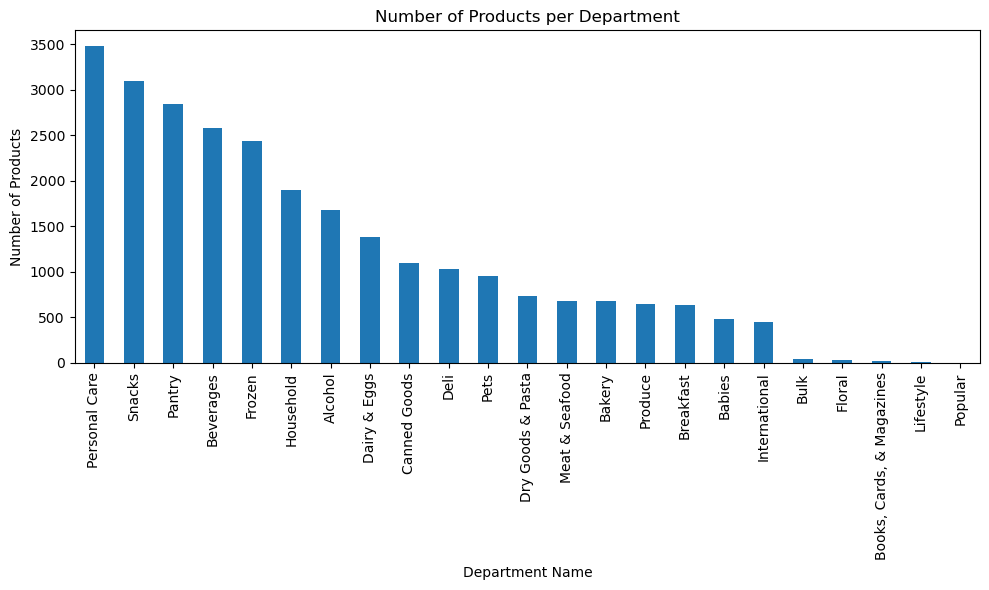

Personal Care                3477
Snacks                       3099
Pantry                       2839
Beverages                    2580
Frozen                       2436
Household                    1891
Alcohol                      1672
Dairy & Eggs                 1381
Canned Goods                 1093
Deli                         1028
Pets                          956
Dry Goods & Pasta             727
Meat & Seafood                677
Bakery                        674
Produce                       646
Breakfast                     632
Babies                        478
International                 451
Bulk                           37
Floral                         26
Books, Cards, & Magazines      13
Lifestyle                       7
Popular                         1
Name: DEPARTMENT_NAME, dtype: int64


In [8]:
#Analyze products...
#--Visualization of # of units

product_counts = product_df['DEPARTMENT_NAME'].value_counts()

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Number of Products per Department')
plt.xlabel('Department Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)  # 
plt.tight_layout()  
plt.show()
print(product_counts)

In [9]:
#what departement weighs the most i.e. which departmentt takes more power to move?

fig, axes = plt.subplots(nrows=len(department_dfs), ncols=1, figsize=(10, 5 * len(department_dfs)))
fig.tight_layout(pad=5.0)

for (dept, df), ax in zip(department_dfs.items(), axes.flatten()):
        ax.hist(df['WEIGHT_GRAMS'].dropna(), bins=30, color='blue', alpha=0.7)
        ax.set_title(f'WEIGHT_GRAMS for {dept}')
        ax.set_xlabel('Weight in Grams')
        ax.set_ylabel('Frequency')

plt.show()

for dept, df in department_dfs.items():
    if 'WEIGHT_GRAMS' in df.columns and not df['WEIGHT_GRAMS'].empty:
        average_weights[dept] = df['WEIGHT_GRAMS'].mean()


heaviest_department = max(average_weights, key=average_weights.get)
heaviest_weight = average_weights[heaviest_department]
print(f"The department with the heaviest items on average is {heaviest_department} with an average weight of {heaviest_weight:.2f} grams.")


NameError: name 'department_dfs' is not defined

In [ ]:
#quartley sales?
purchases_df = pd.merge(purchases_df, product_df[['PRODUCT_ID', 'DEPARTMENT_NAME']], on='PRODUCT_ID', how='inner')

dept_sales_over_time = purchases_df.groupby(['DATE', 'DEPARTMENT_NAME'])['QUANTITY'].sum().unstack()

#sales per dept
plt.figure(figsize=(14, 7))
dept_sales_over_time.plot(kind='line', marker='o')
plt.title('Sales Over Time by Department')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=70)
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

sales_over_time = purchases_df.groupby('DATE')['QUANTITY'].sum()

# sales over time
plt.figure(figsize=(12, 6))
sales_over_time.plot(title='Total Sales Over Time', color='blue', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

#total sales
print("Descriptive Statistics for Quantity Sold:")
print(purchases_df['QUANTITY'].describe())


In [ ]:
#best products?
total_products_purchasaes = purchases_df.groupby('PRODUCT_ID')['QUANTITY'].sum()
top_products = total_products_purchasaes.nlargest(10)
top_products_with_depts = pd.merge(top_products, purchases_df[['PRODUCT_ID', 'DEPARTMENT_NAME']], on='PRODUCT_ID', how='left').drop_duplicates()

print(top_products_with_depts)

plt.figure(figsize=(10, 6))
plt.bar(top_products.index.astype(str), top_products, color='blue')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Selling Products')
plt.tight_layout()  
plt.show()

In [ ]:
#daily output
purchases_df['DATE'] = pd.to_datetime(purchases_df['DATE'], format='%Y-%m-%d')


sales_by_day = purchases_df.groupby(purchases_df['DATE'].dt.dayofweek)['QUANTITY'].sum()
sales_by_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day.plot(kind='bar', title='Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=90)
plt.ylabel('Units Sold')
plt.show()

average_sales_per_transaction = purchases_df.groupby('PURCHASE_ID')['QUANTITY'].sum().mean()
print(f"Average sales per transaction: {average_sales_per_transaction:.2f}")
      
peak_day_value = sales_by_day.max()
peak_day_index = sales_by_day.idxmax()
trough_day_value = sales_by_day.min()
trough_day_index = sales_by_day.idxmin()

print(f"The day with the most sales is {peak_day_index} with {peak_day_value} units sold.")
print(f"The day  with the least sales is {trough_day_index} with {trough_day_value} units sold.")



In [ ]:
#what department sells the most? which least?

sales_counts = purchases_df['DEPARTMENT_NAME'].value_counts()

most_sales_department = sales_counts.idxmax()
least_sales_department = sales_counts.idxmin()

print(f"Department with the most sales: {most_sales_department} ({sales_counts[most_sales_department]} sales)")
print(f"Department with the least sales: {least_sales_department} ({sales_counts[least_sales_department]} sales)")


#produce sells + but with < items than personal care  

In [ ]:
#descriptive stats of every department 

complete_df = pd.merge(purchases_df, product_df[['PRODUCT_ID', 'DEPARTMENT_NAME']], on='PRODUCT_ID', how='inner')

# Iterate over each department and print .info()
for dept in departments:
    print(f"\nInfo for department: {dept}")
    dept_df = product_df[product_df['DEPARTMENT_NAME'] == dept]
    print(dept_df.describe())

In [ ]:
department_sales = purchases_df.groupby('DEPARTMENT_NAME')['QUANTITY'].sum().sort_values(ascending=False)

department_contribution = round((department_sales / purchases_df['QUANTITY'].sum() * 100),4)
print("% Department Contribution to Total Sales:")
print(department_contribution)

In [ ]:
#outliers

#-- Z Scores for products

z_scores = np.abs((product_df[numeric_cols] - product_df[numeric_cols].mean()) / product_df[numeric_cols].std())
outliers = z_scores > 3
outliers.sum()

#-- removing outliers
def remove_outliers(df, z_threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    return df[(z_scores < z_threshold).all(axis=1)]


product_df_no_outliers = remove_outliers(product_df[numeric_cols])

print("Descriptive statistics with outliers:")
print(product_df[numeric_cols].describe())

print("\nDescriptive statistics without outliers:")
print(product_df_no_outliers.describe())


In [ ]:
encoder = OneHotEncoder()
encoded_depts = encoder.fit_transform(purchases_df[['DEPARTMENT_NAME']]).toarray()
encoded_depts_df = pd.DataFrame(encoded_depts, columns=encoder.get_feature_names_out(['DEPARTMENT_NAME']))

final_df = pd.concat([purchases_df[['WIDTH_INCHES', 'HEIGHT_INCHES', 'DEPTH_INCHES']], encoded_depts_df, purchases_df['QUANTITY']], axis=1)

X = final_df.drop('QUANTITY', axis=1)
y = final_df['QUANTITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# performacne
print(f"Model R^2 score: {model.score(X_test, y_test)}")

# new product prediction
simulated_product = {
    'WIDTH_INCHES': 10.0,
    'HEIGHT_INCHES': 20.0,
    'DEPTH_INCHES': 5.0,
    'DEPARTMENT_NAME': 0
}

simulated_df = pd.DataFrame([simulated_product])

simulated_encoded_depts = encoder.transform(simulated_df[['DEPARTMENT_NAME']]).toarray()
simulated_encoded_df = pd.DataFrame(simulated_encoded_depts, columns=encoder.get_feature_names_out(['DEPARTMENT_NAME']))

simulated_final_df = pd.concat([simulated_df[['WIDTH_INCHES', 'HEIGHT_INCHES', 'DEPTH_INCHES']], simulated_encoded_df], axis=1)

for col in X.columns:
    if col not in simulated_final_df:
        simulated_final_df[col] = 0

simulated_final_df = simulated_final_df[X.columns]

predicted_quantity = model.predict(simulated_final_df)
print(f"Predicted quantity for the new product: {predicted_quantity[0]}")
